<a href="https://colab.research.google.com/github/Ranjani94/Advanced_Deep_Learning/blob/master/Assignment_2/Low_level_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GradientTape - Gradients and automation differentiation

GradientTape is used to record all the computations of the Tensorflow during the forward pass and use that recording to reverse the opereation that is followed in forward pass in order to compute the gradients. This is termed as automatic differentiation between forward and backward pass by tensorflow which provides tf.gradientstape API. 

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 34kB/s 
     |████████████████████████████████| 450kB 50.9MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 3.8MB 53.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=10e7212a4ea3bbcb4d3efff7693aa49aab521ae2527bd04ece4020484388316e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


###A simple example of mathematics operation using tensorflow

In [3]:
#Tensor array
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [4]:
#Numpy array
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [5]:
x.dtype #data type

tf.int32

In [6]:
x.shape #shape of an array

TensorShape([2, 2])

In [7]:
#Creating constant tensors
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


###To randomly create constant tensors

In [8]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[-1.4573668 , -0.95970184],
       [ 0.6092333 ,  1.1156116 ]], dtype=float32)>

In [9]:
#creating random integer tensor
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[3, 8],
       [3, 8]], dtype=int32)>

###To create a mutable variables in tensor in order to adjust the variables in gradients computation like updating weights

In [10]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.5082222 , -0.24706121],
       [-0.42037594, -2.4402618 ]], dtype=float32)>


###Updating the value of the variable by using the methods

In [11]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

###Math operation in tensorflow

In [12]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))
print(a)
print(b)
c = a + b
d = tf.square(c)
e = tf.exp(d)

tf.Tensor(
[[ 0.31420308 -0.04560246]
 [-1.4120841  -0.9994091 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.08870656  0.97376335]
 [ 0.554469   -1.1829296 ]], shape=(2, 2), dtype=float32)


In [13]:
c #addition

<tf.Tensor: id=89, shape=(2, 2), dtype=float32, numpy=
array([[ 0.22549653,  0.9281609 ],
       [-0.8576151 , -2.1823387 ]], dtype=float32)>

In [14]:
d #squaring the values

<tf.Tensor: id=90, shape=(2, 2), dtype=float32, numpy=
array([[0.05084869, 0.8614827 ],
       [0.7355037 , 4.7626023 ]], dtype=float32)>

In [15]:
e #computing exponent

<tf.Tensor: id=91, shape=(2, 2), dtype=float32, numpy=
array([[  1.0521637,   2.366667 ],
       [  2.0865326, 117.05013  ]], dtype=float32)>

###Example to compute gradients using GradienTape

In [16]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

#records all the operation associated with a variable
with tf.GradientTape() as tape:
  tape.watch(a)  
  c = tf.sqrt(tf.square(a) + tf.square(b))  #Mathematical operation
  
  dc_da = tape.gradient(c, a) #computes the gradient c with respect to a
  print(dc_da)


  #By default all the variables are watched, there is no need to mention them

tf.Tensor(
[[-0.99783295  0.39823732]
 [ 0.4718664  -0.9922882 ]], shape=(2, 2), dtype=float32)


###To compute higher order derivatives, we can use the nesting tapes

In [17]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.99783295  0.39823732]
 [ 0.4718664  -0.9922882 ]], shape=(2, 2), dtype=float32)


In [18]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[0.0043776  1.8991182 ]
 [0.4736342  0.05569267]], shape=(2, 2), dtype=float32)


###Computing Linear Classifier using gradientTape and low level tensorflow

In [19]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

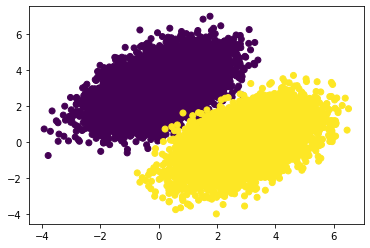

In [20]:
#generating artificial data in order to demostrate the model
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [21]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0428
Epoch 1: last batch loss = 0.0344
Epoch 2: last batch loss = 0.0238
Epoch 3: last batch loss = 0.0223
Epoch 4: last batch loss = 0.0194
Epoch 5: last batch loss = 0.0240
Epoch 6: last batch loss = 0.0188
Epoch 7: last batch loss = 0.0272
Epoch 8: last batch loss = 0.0252
Epoch 9: last batch loss = 0.0301
Epoch 10: last batch loss = 0.0178
Epoch 11: last batch loss = 0.0356
Epoch 12: last batch loss = 0.0242
Epoch 13: last batch loss = 0.0254
Epoch 14: last batch loss = 0.0292
Epoch 15: last batch loss = 0.0306
Epoch 16: last batch loss = 0.0222
Epoch 17: last batch loss = 0.0177
Epoch 18: last batch loss = 0.0215
Epoch 19: last batch loss = 0.0294


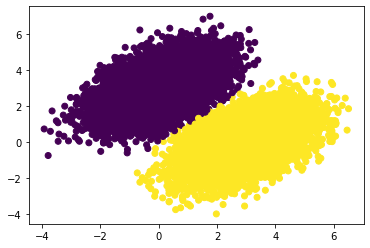

In [22]:
#Show model performance
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

###To make it run fast, we use tf.functions

In [23]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))


Time per epoch: 0.119 s


In [24]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [25]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.073 s


###More examples for enhanced operation using gradientTape

In [26]:
import numpy as np
import random

# Loss function
def loss(real_y, pred_y):
    return tf.abs(real_y - pred_y)

# Training data
x_train = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.asarray([i*10+5 for i in x_train]) # y = 10x+5

# Trainable variables
a = tf.Variable(random.random(), trainable=True)
b = tf.Variable(random.random(), trainable=True)

In [27]:
def step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        # Make prediction
        pred_y = a * real_x + b
        # Calculate loss
        reg_loss = loss(real_y, pred_y)
    
    # Calculate gradients
    a_gradients, b_gradients = tape.gradient(reg_loss, (a, b))

    # Update variables
    a.assign_sub(a_gradients * 0.001)
    b.assign_sub(b_gradients * 0.001)

In [29]:
for _ in range(100000):
    step(x_train, y_train)

print(f'y ≈ {a.numpy()}x + {b.numpy()}')

y ≈ 10.045232772827148x + 5.00129508972168


###GRadientTape for MNIST classification


In [30]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal 

# Load and pre-process training data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train / 255).reshape((-1, 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, 10)
x_test = (x_test / 255).reshape((-1, 28, 28, 1))
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Hyperparameters
batch_size = 128
epochs = 50
optimizer = Adam(lr=0.001)
weight_init = RandomNormal()

11493376/11490434 [==============================] - 0s 0us/step


In [31]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

# Build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=weight_init, input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=weight_init))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=weight_init))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer=weight_init))

In [32]:
def step(real_x, real_y):
    with tf.GradientTape() as tape:
        # Make prediction
        pred_y = model(real_x.reshape((-1, 28, 28, 1)))
        # Calculate loss
        model_loss = tf.keras.losses.categorical_crossentropy(real_y, pred_y)
    
    # Calculate gradients
    model_gradients = tape.gradient(model_loss, model.trainable_variables)
    # Update model
    optimizer.apply_gradients(zip(model_gradients, model.trainable_variables))

###Another example for gradienttape using linear classifier

A Layer encapsulates a state (weights) and some computation (defined in the call method).

In [35]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Instantiate our layer.
linear_layer = Linear(4, 2)

A layer instance works like a function. Let's call it on some data:

In [36]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

The Layer class takes care of tracking the weights assigned to it as attributes:

In [37]:
# Weights are automatically tracked under the `weights` property.
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

It’s good practice to create weights in a separate build method, called lazily with the shape of the first inputs seen by your layer. Here, this pattern prevents us from having to specify input_dim in the constructor:

In [38]:
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

###Using trainable and non-trainable weights

In [39]:
from tensorflow.keras.layers import Layer

class ComputeSum(Layer):
  """Returns the sum of the inputs."""

  def __init__(self, input_dim):
      super(ComputeSum, self).__init__()
      # Create a non-trainable weight.
      self.total = tf.Variable(initial_value=tf.zeros((input_dim,)),
                               trainable=False)

  def call(self, inputs):
      self.total.assign_add(tf.reduce_sum(inputs, axis=0))
      return self.total  

my_sum = ComputeSum(2)
x = tf.ones((2, 2))

y = my_sum(x)
print(y.numpy())  # [2. 2.]

y = my_sum(x)
print(y.numpy())  # [4. 4.]

assert my_sum.weights == [my_sum.total]
assert my_sum.non_trainable_weights == [my_sum.total]
assert my_sum.trainable_weights == []

[2. 2.]
[4. 4.]


###REcursively composing layers

In [40]:

class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()

# The first call to the `mlp` object will create the weights.
y = mlp(tf.ones(shape=(3, 64)))

# Weights are recursively tracked.
assert len(mlp.weights) == 6

###Training argument in call

In [41]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
mlp = MLPWithDropout()
y_train = mlp(tf.ones((2, 2)), training=True)
y_test = mlp(tf.ones((2, 2)), training=False)

###functional way of defining models



In [42]:
inputs = tf.keras.Input(shape=(16,))
x = Linear(32)(inputs) # We are reusing the Linear layer we defined earlier.
x = Dropout(0.5)(x) # We are reusing the Dropout layer we defined earlier.
outputs = Linear(10)(x)
model = tf.keras.Model(inputs, outputs)
assert len(model.weights) == 4

# Let's call our model on some data.
y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

For models that are simple stacks of layers with a single input and a single output, you can also use the Sequential class which turns a list of layers into a Model:

In [43]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [44]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Targets
y_pred = [1., 1., 1., 0.]  # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522857


In [45]:
m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


###An end to end example for gradienTape

In [46]:
from tensorflow.keras import layers

# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = model(x)

    # Loss value for this batch.
    loss_value = loss(y, logits)
     
  # Get gradients of loss wrt the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Update the running accuracy.
  accuracy.update_state(y, logits)
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

Step: 0
Loss from last step: 2.338
Total running accuracy so far: 0.141
Step: 100
Loss from last step: 0.348
Total running accuracy so far: 0.845
Step: 200
Loss from last step: 0.179
Total running accuracy so far: 0.883
Step: 300
Loss from last step: 0.213
Total running accuracy so far: 0.900
Step: 400
Loss from last step: 0.234
Total running accuracy so far: 0.910
Step: 500
Loss from last step: 0.232
Total running accuracy so far: 0.918
Step: 600
Loss from last step: 0.088
Total running accuracy so far: 0.924
Step: 700
Loss from last step: 0.044
Total running accuracy so far: 0.929
Step: 800
Loss from last step: 0.135
Total running accuracy so far: 0.932
Step: 900
Loss from last step: 0.069
Total running accuracy so far: 0.936
